In [15]:
from tensorflow.python import pywrap_tensorflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file_name = '../output/vgg16/voc_2007_trainval/default/vgg16_faster_rcnn_iter_70000.ckpt'
reader = pywrap_tensorflow.NewCheckpointReader(file_name)
var_to_shape_map = reader.get_variable_to_shape_map()

In [34]:
dic = {}
for key in sorted(var_to_shape_map):
    if 'conv' in key and key.endswith('weights'):
        dic[key] = np.reshape(np.sum(reader.get_tensor(key),axis=(0,1,2)),[1,-1])
        print dic[key].shape
        fig= plt.figure(figsize=(dic[key].shape[1], 1), dpi= 20, facecolor='w', edgecolor='k')
        ax = plt.axes()
        plt.subplot()
        heatmap = ax.pcolor(dic[key],cmap=plt.cm.Blues,alpha=0.8)

(1, 64)
(1, 64)
(1, 128)
(1, 128)
(1, 256)
(1, 256)
(1, 256)
(1, 512)
(1, 512)
(1, 512)
(1, 512)
(1, 512)
(1, 512)
(1, 512)


-0.00822793911539
0.353681770299
0.0285971776357
-0.0808621757815
-0.507749309792
-1.08771291675
-1.96106126136
-2.96247183695
-4.80106027704
-7.0060725566
-5.51590132527
-5.3026896033
-5.9070943349
-1.14320073378


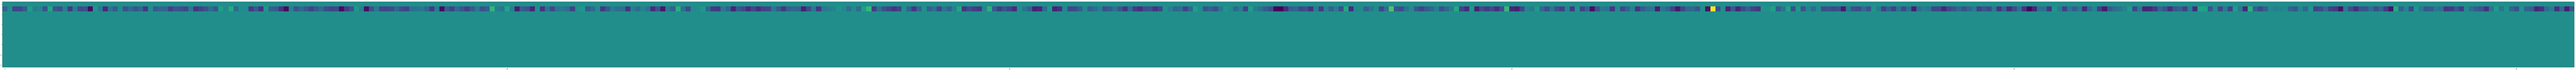

In [33]:
arr_new = np.zeros([13,512])
dic = {}
for key in sorted(var_to_shape_map):
    ind = 0
    if 'conv' in key and key.endswith('weights'):
        ind += 1
        dic[key] = np.sum(reader.get_tensor(key),axis=(0,1,2))
        length = dic[key].shape[0]
        arr_new[ind][:length] = dic[key]
        print np.average(arr_new[ind])
        

fig= plt.figure(figsize=(512, 13), dpi= 20, facecolor='w', edgecolor='k')
ax = plt.axes()
plt.imshow(arr_new)
# plt.subplot()
# heatmap = ax.pcolor(arr_new,cmap=plt.cm.Blues,alpha=0.8)